# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# from plotly import plotly
# import plotly.offline as offline
# import plotly.graph_objs as go
# offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [5]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.6,23,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.0,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = sentance.lower()
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:48<00:00, 2267.95it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

In [19]:
# Updating dataframe for clean project title and remove old project title
project_data['clean_essay'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.6,23,Literacy_Language,ESL Literacy,students english learners working english seco...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.0,1,History_Civics Health_Sports,Civics_Government TeamSports,students arrive school eager learn polite gene...


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = sentance.lower()
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 53022.31it/s]


In [21]:
# after preprocesing
preprocessed_title[20000]

'need move input'

In [22]:
# Updating dataframe for clean project title and remove old project title
project_data['clean_project_title'] = preprocessed_title
project_data.drop(['project_title'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_essay,clean_project_title
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.6,23,Literacy_Language,ESL Literacy,students english learners working english seco...,educational support english learners home
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.0,1,History_Civics Health_Sports,Civics_Government TeamSports,students arrive school eager learn polite gene...,wanted projector hungry learners


# Preprocessing project_grade

In [23]:
# similarly you can preprocess the project_grade also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_grade = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_grade_category'].values):
    sent = sentance.lower()
    sent = decontracted(sent)
    sent = sent.replace(' ', '_')
    sent = sent.replace('-', '_')
    # https://gist.github.com/sebleier/554280
#     sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_grade.append(sent.strip())

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 131950.15it/s]


In [24]:
preprocessed_grade[:10]

['grades_prek_2',
 'grades_6_8',
 'grades_6_8',
 'grades_prek_2',
 'grades_prek_2',
 'grades_3_5',
 'grades_6_8',
 'grades_3_5',
 'grades_prek_2',
 'grades_prek_2']

In [25]:
# Updating dataframe for clean project title and remove old project title
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data['project_grade_category'] = preprocessed_grade
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_essay,clean_project_title,project_grade_category
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.6,23,Literacy_Language,ESL Literacy,students english learners working english seco...,educational support english learners home,grades_prek_2
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.0,1,History_Civics Health_Sports,Civics_Government TeamSports,students arrive school eager learn polite gene...,wanted projector hungry learners,grades_6_8


In [26]:
# remove unnecessary column: https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/
project_data = project_data.drop(['Unnamed: 0','id','teacher_id','project_submitted_datetime', \
                                  'project_essay_1','project_essay_2','project_essay_3','project_essay_4', \
                                  'project_resource_summary'], axis=1)

In [27]:
project_data.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_essay,clean_project_title,project_grade_category
0,Mrs.,IN,0,0,154.6,23,Literacy_Language,ESL Literacy,students english learners working english seco...,educational support english learners home,grades_prek_2
1,Mr.,FL,7,1,299.0,1,History_Civics Health_Sports,Civics_Government TeamSports,students arrive school eager learn polite gene...,wanted projector hungry learners,grades_6_8


# Check whether each column contain NaN or Not

In [28]:
project_data['teacher_prefix'].isnull().values.any()

True

In [29]:
project_data['school_state'].isnull().values.any()

False

In [30]:
project_data['teacher_number_of_previously_posted_projects'].isnull().values.any()

False

In [31]:
project_data['project_is_approved'].isnull().values.any()

False

In [32]:
project_data['price'].isnull().values.any()

False

In [33]:
project_data['quantity'].isnull().values.any()

False

In [34]:
project_data['clean_categories'].isnull().values.any()

False

In [35]:
project_data['clean_subcategories'].isnull().values.any()

False

In [36]:
project_data['clean_essay'].isnull().values.any()

False

In [37]:
project_data['clean_project_title'].isnull().values.any()

False

In [38]:
project_data['project_grade_category'].isnull().values.any()

False

#### Since we got 'teacher prefix' attributes which contain NaN. Let check how many NaN are contain in this attributes

In [39]:
project_data['teacher_prefix'].isnull().sum().sum()

3

## 1.5 Preparing data for models

In [40]:
project_data.columns

Index(['teacher_prefix', 'school_state',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'clean_essay', 'clean_project_title', 'project_grade_category'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:59<00:00, 1823.16it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [07:32<00:00, 241.33it/s]


109248
300


In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [0]:
price_standardized

array([[0.00098843, 0.00191166, 0.00330448, ..., 0.00153418, 0.00046704,
        0.00070265]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [41]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# Combine the train.csv and resource.csv
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
# https://www.geeksforgeeks.org/python-pandas-dataframe-sample/
# Take 50k dataset
project_data = project_data.sample(n=50000)
# Remove that row which contain NaN. We observed that only 3 rows that contain NaN
project_data = project_data[pd.notnull(project_data['teacher_prefix'])]
project_data.shape

(49998, 11)

In [42]:
tr_X = project_data

# # We are considering only the bigram words which appeared in at least 10 documents with max feature = 5000(rows or projects).
vectorizer_bow = TfidfVectorizer(min_df=10, max_features=5000)
tr_essay = vectorizer_bow.fit_transform(tr_X['clean_essay'].values)
print("Shape of essay matrix after one hot encodig on train",tr_essay.shape)

# # Similarly you can vectorize for title also
vectorizer_bowt = TfidfVectorizer(min_df=10, max_features=5000)
tr_title = vectorizer_bowt.fit_transform(tr_X['clean_project_title'].values)
print("Shape of title matrix after one hot encodig ",tr_title.shape)

Shape of essay matrix after one hot encodig on train (49998, 5000)
Shape of title matrix after one hot encodig  (49998, 1989)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [43]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# # For Numerical with train data

# ### 1) quantity
from sklearn.preprocessing import Normalizer
# # normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

quantity_scalar = Normalizer()
quantity_scalar.fit(tr_X['quantity'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
quantity_normalized = quantity_scalar.transform(tr_X['quantity'].values.reshape(1, -1))

# ### 2) price

# # the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1

price_scalar = Normalizer()
price_scalar.fit(tr_X['price'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
price_normalized = price_scalar.transform(tr_X['price'].values.reshape(1, -1))

# ### 3) For teacher_number_of_previously_projects

# # We are going to represent the teacher_number_of_previously_posted_projects, as numerical values within the range 0-1

teacher_number_of_previously_posted_projects_scalar = Normalizer()
teacher_number_of_previously_posted_projects_scalar.fit(tr_X['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
teacher_number_of_previously_posted_projects_normalized = teacher_number_of_previously_posted_projects_scalar.transform(tr_X['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

In [44]:
print('Shape of quantity:', quantity_normalized.T.shape)
print('Shape of price:', price_normalized.T.shape)
print('Shape of teacher_number_of_previously_posted_projects:', teacher_number_of_previously_posted_projects_normalized.T.shape)

Shape of quantity: (49998, 1)
Shape of price: (49998, 1)
Shape of teacher_number_of_previously_posted_projects: (49998, 1)


In [45]:
quantity_normalized.T

array([[0.00172598],
       [0.00014383],
       [0.00028766],
       ...,
       [0.00143831],
       [0.00014383],
       [0.00186981]])

In [46]:
price_normalized.T

array([[0.00048123],
       [0.00336102],
       [0.00220479],
       ...,
       [0.00133815],
       [0.00758878],
       [0.00425751]])

In [47]:
teacher_number_of_previously_posted_projects_normalized.T

array([[0.00014816],
       [0.0007408 ],
       [0.00059264],
       ...,
       [0.00770437],
       [0.00044448],
       [0.00251874]])

In [48]:
# For categorical with train data
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
# One hot encoding for school state

### 1) school_state
print('==================================================================\n')
# Count Vectorize with vocuabulary contains unique code of school state and we are doing boolen BoW
vectorizer_school_state = CountVectorizer(vocabulary=tr_X['school_state'].unique(), lowercase=False, binary=True)
vectorizer_school_state.fit(tr_X['school_state'].values)
print('List of feature in school_state',vectorizer_school_state.get_feature_names())

# Transform train data
school_state_one_hot = vectorizer_school_state.transform(tr_X['school_state'].values)
print("\nShape of school_state matrix after one hot encoding ",school_state_one_hot.shape)

### 2) project_subject_categories
print('==================================================================\n')
vectorizer_categories = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_categories.fit(tr_X['clean_categories'].values)
print('List of features in project_subject_categories',vectorizer_categories.get_feature_names())

# Transform train data
categories_one_hot = vectorizer_categories.transform(tr_X['clean_categories'].values)
print("\nShape of project_subject_categories matrix after one hot encodig ",categories_one_hot.shape)

### 3) project_subject_subcategories
print('==================================================================\n')
vectorizer_subcategories = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_subcategories.fit(tr_X['clean_subcategories'].values)
print('List of features in project_subject_categories',vectorizer_subcategories.get_feature_names())

# Transform train data
subcategories_one_hot = vectorizer_subcategories.transform(tr_X['clean_subcategories'].values)
print("\nShape of project_subject_subcategories matrix after one hot encodig ",subcategories_one_hot.shape)

### 4) project_grade_category
print('==================================================================\n')
# One hot encoding for project_grade_category

# Count Vectorize with vocuabulary contains unique code of project_grade_category and we are doing boolen BoW
vectorizer_grade_category = CountVectorizer(vocabulary=tr_X['project_grade_category'].unique(), lowercase=False, binary=True)
vectorizer_grade_category.fit(tr_X['project_grade_category'].values)
print('List of features in project_grade_category',vectorizer_grade_category.get_feature_names())

# Transform train data
project_grade_category_one_hot = vectorizer_grade_category.transform(tr_X['project_grade_category'].values)
print("\nShape of project_grade_category matrix after one hot encodig ",project_grade_category_one_hot.shape)

### 5) teacher_prefix
print('==================================================================\n')
# One hot encoding for teacher_prefix

# Count Vectorize with vocuabulary contains unique code of teacher_prefix and we are doing boolen BoW
# Since some of the data is filled with nan. So we update the nan to 'None' as a string
# tr_X['teacher_prefix'] = tr_X['teacher_prefix'].fillna('None')
vectorizer_teacher_prefix = CountVectorizer(vocabulary=tr_X['teacher_prefix'].unique(), lowercase=False, binary=True)
vectorizer_teacher_prefix.fit(tr_X['teacher_prefix'].values)
print('List of features in teacher_prefix',vectorizer_teacher_prefix.get_feature_names())

# Transform train data
teacher_prefix_one_hot = vectorizer_teacher_prefix.transform(tr_X['teacher_prefix'].values)
print("\nShape of teacher_prefix matrix after one hot encoding ",teacher_prefix_one_hot.shape)


List of feature in school_state ['NC', 'NJ', 'FL', 'IL', 'TX', 'PA', 'CA', 'WI', 'NM', 'VA', 'UT', 'WV', 'SC', 'AR', 'OH', 'GA', 'CO', 'MS', 'KY', 'AZ', 'HI', 'KS', 'MI', 'WA', 'MA', 'LA', 'MO', 'MN', 'ME', 'NY', 'MD', 'IN', 'AL', 'NE', 'CT', 'OR', 'OK', 'AK', 'ND', 'IA', 'NV', 'NH', 'TN', 'SD', 'DC', 'DE', 'WY', 'RI', 'ID', 'MT', 'VT']

Shape of school_state matrix after one hot encoding  (49998, 51)

List of features in project_subject_categories ['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']

Shape of project_subject_categories matrix after one hot encodig  (49998, 9)

List of features in project_subject_categories ['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_

In [49]:
vectorizer_school_state.get_feature_names()[0], len(vectorizer_school_state.get_feature_names())

('NC', 51)

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [50]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### Note:
> We already have preprocessed both essay and project_title in Text processing section (1.3 and 1.4) above

In [50]:
# for train data
from scipy.sparse import hstack
tr_X = hstack((quantity_normalized.T, price_normalized.T, teacher_number_of_previously_posted_projects_normalized.T, \
              school_state_one_hot, categories_one_hot, subcategories_one_hot, project_grade_category_one_hot, \
              teacher_prefix_one_hot, tr_essay, tr_title))
tr_X.shape

(49998, 7091)

Columns Index Range - Column Names <br>
0 - Quantity Normalized<br>
1 - Price Normalized<br>
2 - teacher Number of previously posted projects Normalized<br>
[3,53] - school state onehot encoding<br>
[54,62] - project subject categories onehot encoding<br>
[63-92] - project subject subcategories onehot encoding<br>
[93,96] - project grade category onehot encoding<br>
[97-101] - teacher prefix onehotencoding<br>
[102-5101] - project essay<br>
[5102-7116] - project title

In [51]:
tr_X = tr_X.toarray()
tr_X[0]

array([0.00172598, 0.00048123, 0.00014816, ..., 0.        , 0.        ,
       0.        ])

<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [52]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.decomposition import PCA
import time

pca = PCA(n_components=5000)
start = time.time()
pca.fit(tr_X)
print('End:',time.time()-start)

End: 574.0585031509399


In [53]:
tr_X_new = pca.transform(tr_X)
tr_X_new.shape

(49998, 5000)

<h2>2.5 Apply Kmeans</h2>

In [55]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.cluster import KMeans
import tqdm

n_c = np.arange(2,31)
k_in = []
for i in tqdm.tqdm_notebook(n_c):
    model = KMeans(n_clusters=i,n_init=10,random_state=1)
    model.fit(tr_X_new)
    k_in.append(model.inertia_)

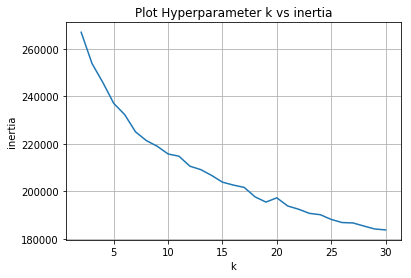

In [57]:
plt.plot(n_c,k_in)
plt.title('Plot Hyperparameter k vs inertia')
plt.xlabel('k')
plt.ylabel('inertia')
plt.grid()
plt.show()

> I found k=19 to be the suitable one using elbow method

In [54]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=19,n_init=10,random_state=1)
model.fit(tr_X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=19, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [55]:
model.labels_

array([13, 11, 15, ...,  8, 15,  4])

In [56]:
tr_X = pd.DataFrame(tr_X)
tr_X['k_cluster'] = model.labels_.tolist()
tr_X.head()

,0,1,2,3,4,5,6,7,8,9,...,7082,7083,7084,7085,7086,7087,7088,7089,7090,k_cluster
0,0.001726,0.000481,0.000148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
1,0.000144,0.003361,0.000741,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
2,0.000288,0.002205,0.000593,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
3,0.002733,0.002801,0.000889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4,0.005753,0.000081,0.000889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17


#### Print wordcloud with three cluster

### Cluster 1

In [108]:
col_index = tr_X[tr_X['k_cluster']==1].index.tolist()
tr_1 = []
for i in col_index:
    tr_1.append(str(project_data['clean_essay'].iloc[i]))

In [123]:
tr_1[0]

'students amazing kids low socioeconomic area resources scarce many students foster children come school never owned book students love learning equal opportunity learn children school would love multiple books choose would extremely thrilled cozy place curl read hope help students become excited reading reading extremely important children books would fill class library amazing choices spark student interest reading students would love colorful books class library child size chairs soothing rug would also offer safe comfortable place students read not wish teach students read also would love instill love reading dream open door imagination reading hope allow students opportunity explore introducing many types books nannan'

In [124]:
word_dict = {}
for i in tr_1:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

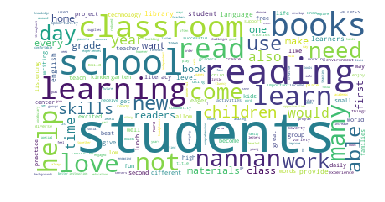

In [129]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Cluster 2

In [130]:
col_index = tr_X[tr_X['k_cluster']==2].index.tolist()
tr_2 = []
for i in col_index:
    tr_2.append(str(project_data['clean_essay'].iloc[i]))

In [131]:
tr_2[0]

'teach low income school bowling green kentucky 2nd year teaching school 4th year overall estimation school one diverse populations state many different spoken languages teach school students appreciate absolutely everything little things including lucky charms st patrick day decorating pumpkins halloween certainly appreciative bunch students would love least 2 ipads protective cases use classroom currently 3 disposal 2 personal devices provided school school called reader math workshop workshop students participating daily 5 daily 3 centers would like least another ipad centers daily activities ar tests informational writing research learning applications dreambox lexia last year 2nd grade class ranked 2nd school behind 6th grade total ar points quite accomplishment technology available possibilities endless students appreciative anything everything not imagine reactions possibility finding could even technology available us nannan'

In [132]:
word_dict = {}
for i in tr_2:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

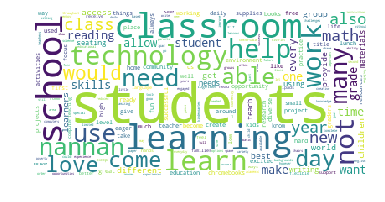

In [133]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Cluster 3

In [134]:
col_index = tr_X[tr_X['k_cluster']==3].index.tolist()
tr_3 = []
for i in col_index:
    tr_3.append(str(project_data['clean_essay'].iloc[i]))

In [135]:
tr_3[0]

'makes students special individuals unique qualities experiences personalities brought together classroom setting eager learn collectively members rural community located foothills north carolina students nothing short amazing individuals ready 4th graders excited meet challenge also attend title school 100 free breakfast lunch low income households difficulty meeting basic needs teacher want offer much assistance encouragement help grow individuals well foster love learning donations project help contribute positive reading energy classroom last year taught 1st 2nd grade learning curve complete teaching 4th grade mythology interesting way looking world past cultures influenced modern society part teaching chose incorporate percy jackson lightning thief reading school not class set chose read aloud students absolutely loved book knew incorporate next 4th grade class leads explain requesting capture flag board game reading comprehension game students read short paragraphs answer compreh

In [136]:
word_dict = {}
for i in tr_3:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

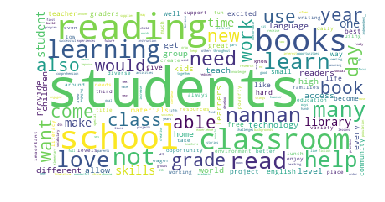

In [137]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h2>2.6 Apply AgglomerativeClustering</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [139]:
from sklearn.cluster import AgglomerativeClustering

tr_X_5000 = tr_X_new[:5000]

# for k=2
model_agg = AgglomerativeClustering(n_clusters=2)
model_agg.fit(tr_X_5000)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [144]:
tr_5000 = tr_X[:5000]
tr_5000['agg_cluster2'] = model_agg.labels_.tolist()
tr_5000.head()

,0,1,2,3,4,5,6,7,8,9,...,7083,7084,7085,7086,7087,7088,7089,7090,k_cluster,agg_cluster2
0,0.001726,0.000481,0.000148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,1
1,0.000144,0.003361,0.000741,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1
2,0.000288,0.002205,0.000593,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0
3,0.002733,0.002801,0.000889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,1
4,0.005753,0.000081,0.000889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,0


### Cluster 1

In [148]:
col_index = tr_5000[tr_5000['agg_cluster2']==0].index.tolist()
tr_1 = []
for i in col_index:
    tr_1.append(str(project_data['clean_essay'].iloc[i]))

In [149]:
tr_1[0]

'students city around 85 students hispanic remainder african american caucasian 100 students receive free reduced lunch teach students currently 3rd grade reading kindergarten level non readers love learn hate read successful life often frustrated lack available resources books laptops projectors sometimes even supplies donation help correct situation students limited technology access classroom chromebooks multiple purposes classroom chromebooks able help students improve typing skills allow become fluent technology plan use google classroom student collaborate projects use google slides retell literary elements story reading class also plan students comment others writing using collaborative conversation sentence starters using class plan use chromebooks station within classroom use various websites multiple content areas students various interests want create time class students use chromebooks research topics interest chromebooks also help data collection reading writing also need 

In [150]:
word_dict = {}
for i in tr_1:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

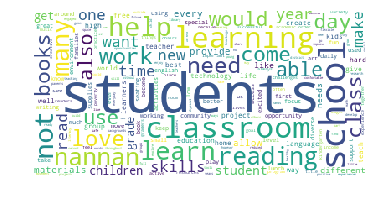

In [151]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Cluster 2

In [152]:
col_index = tr_5000[tr_5000['agg_cluster2']==1].index.tolist()
tr_2 = []
for i in col_index:
    tr_2.append(str(project_data['clean_essay'].iloc[i]))

In [153]:
tr_2[0]

'teach ethnically racially diverse group fourth fifth grade students students group clustered students 80 students live poverty many lack access books home school library main place students go find books read teach north carolina 100 free reduced breakfast lunch school students school innovators creators students energized ready learn grow take pride community continue establish work create look forward next challenge donations project give students new inviting place relax plan reading seating give students another area become comfortable cozy good book read many small group activities six seven students therefore requesting seven bean bag chairs students area foster ideas comfortable meeting space want space place remind home promote good reading skills even school setting plan allow students complete design space first week school differentiated seating focal point area nannan'

In [154]:
word_dict = {}
for i in tr_2:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

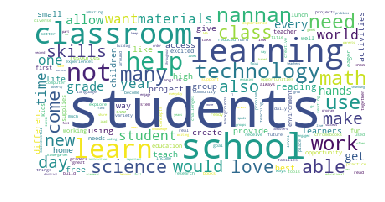

In [155]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [156]:
# for k=5
model_agg = AgglomerativeClustering(n_clusters=5)
model_agg.fit(tr_X_5000)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [157]:
tr_5000 = tr_X[:5000]
tr_5000['agg_cluster5'] = model_agg.labels_.tolist()
tr_5000.head()

,0,1,2,3,4,5,6,7,8,9,...,7083,7084,7085,7086,7087,7088,7089,7090,k_cluster,agg_cluster5
0,0.001726,0.000481,0.000148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,0
1,0.000144,0.003361,0.000741,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,0
2,0.000288,0.002205,0.000593,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,3
3,0.002733,0.002801,0.000889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0
4,0.005753,0.000081,0.000889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,3


### Cluster 1

In [ ]:
col_index = tr_5000[tr_5000['agg_cluster5']==0].index.tolist()
tr_1 = []
for i in col_index:
    tr_1.append(str(project_data['clean_essay'].iloc[i]))

In [158]:
tr_1[0]

'students city around 85 students hispanic remainder african american caucasian 100 students receive free reduced lunch teach students currently 3rd grade reading kindergarten level non readers love learn hate read successful life often frustrated lack available resources books laptops projectors sometimes even supplies donation help correct situation students limited technology access classroom chromebooks multiple purposes classroom chromebooks able help students improve typing skills allow become fluent technology plan use google classroom student collaborate projects use google slides retell literary elements story reading class also plan students comment others writing using collaborative conversation sentence starters using class plan use chromebooks station within classroom use various websites multiple content areas students various interests want create time class students use chromebooks research topics interest chromebooks also help data collection reading writing also need 

In [159]:
word_dict = {}
for i in tr_1:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

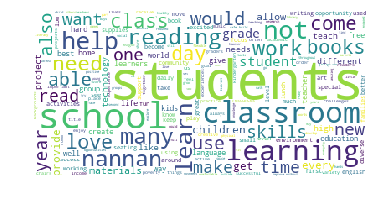

In [160]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Cluster 2

In [161]:
col_index = tr_5000[tr_5000['agg_cluster5']==1].index.tolist()
tr_2 = []
for i in col_index:
    tr_2.append(str(project_data['clean_essay'].iloc[i]))

In [162]:
tr_2[0]

'madison park academy students incredibly resilient reading far grade level every one receives free breakfast lunch many second language learners first families graduate high school walk dangerous neighborhoods come school day return home homework amidst array challenges yet continue showing day bringing humor empathy passion resilience bring wisdom street savvy class asking deep questions pushing one another funny compassionate creative respectful importantly however incredibly resilient overcoming immense obstacles succeed students read snow falling cedars order answer essential question mean racial justice america delve deeply historical cultural moral issues book brings including japanese concentration camps wwii legacies racial oppression means human born skin questions guide reading text also thinking modern day movements like black lives matter students novel serve mechanism empowerment critically examine lives lives around using history guide despite experiences racism oppressi

In [163]:
word_dict = {}
for i in tr_2:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

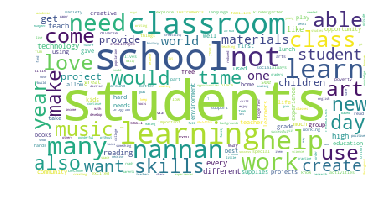

In [164]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Cluster 3

In [165]:
col_index = tr_5000[tr_5000['agg_cluster5']==2].index.tolist()
tr_3 = []
for i in col_index:
    tr_3.append(str(project_data['clean_essay'].iloc[i]))

In [166]:
tr_3[0]

'students amazing kids low socioeconomic area resources scarce many students foster children come school never owned book students love learning equal opportunity learn children school would love multiple books choose would extremely thrilled cozy place curl read hope help students become excited reading reading extremely important children books would fill class library amazing choices spark student interest reading students would love colorful books class library child size chairs soothing rug would also offer safe comfortable place students read not wish teach students read also would love instill love reading dream open door imagination reading hope allow students opportunity explore introducing many types books nannan'

In [167]:
word_dict = {}
for i in tr_3:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

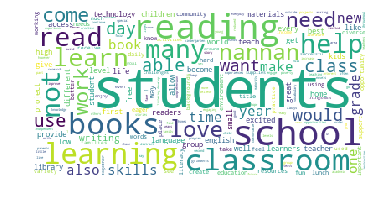

In [168]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Cluster 4

In [171]:
col_index = tr_5000[tr_5000['agg_cluster5']==3].index.tolist()
tr_4 = []
for i in col_index:
    tr_4.append(str(project_data['clean_essay'].iloc[i]))

In [172]:
tr_4[0]

'students city around 85 students hispanic remainder african american caucasian 100 students receive free reduced lunch teach students currently 3rd grade reading kindergarten level non readers love learn hate read successful life often frustrated lack available resources books laptops projectors sometimes even supplies donation help correct situation students limited technology access classroom chromebooks multiple purposes classroom chromebooks able help students improve typing skills allow become fluent technology plan use google classroom student collaborate projects use google slides retell literary elements story reading class also plan students comment others writing using collaborative conversation sentence starters using class plan use chromebooks station within classroom use various websites multiple content areas students various interests want create time class students use chromebooks research topics interest chromebooks also help data collection reading writing also need 

In [173]:
word_dict = {}
for i in tr_4:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

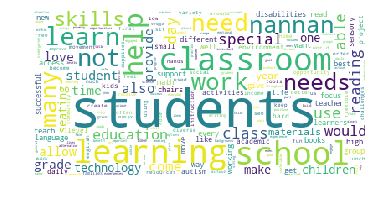

In [174]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Cluster 5

In [175]:
col_index = tr_5000[tr_5000['agg_cluster5']==4].index.tolist()
tr_5 = []
for i in col_index:
    tr_5.append(str(project_data['clean_essay'].iloc[i]))

In [176]:
tr_5[0]

'participate no excuses university class college bound every morning start day eagles chant school also heavily focused arts academy creative expression students busily preparing middle school want everything need successful enjoy positive role models younger students campus school serves diverse population majority students low income families always arrive eager learn full curiosity desire showcase knowledge new creative ways sitting desk several hours row challenge students prefer learn working cooperative groups flexibility move around room students like working floor bouncing ball standing around tables encourage work comfortable seen increased time task overall improvement student engagement students learn better comfortable engaged material contributing project help us add growing collection alternative seating foster creativity collaboration nannan'

In [177]:
word_dict = {}
for i in tr_5:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

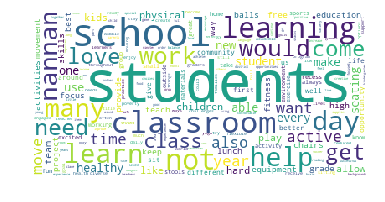

In [178]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h2>2.7 Apply DBSCAN</h2>

In [207]:
# Before applying DBSCAN Algorithm, let us find the optimal value of Eps
from sklearn.metrics.pairwise import euclidean_distances

minpts = 10
x_d = {}

for each_i in range(tr_X_5000.shape[0]):
    dist_ = []
    for each_j in range(tr_X_5000.shape[0]):
        # If both are same data point (xi,xi), dict between will be zero, so ignore itself point
        if each_i == each_j:
            continue
        else:
            dist_.append(euclidean_distances(tr_X_5000[each_i].reshape(1,-1).tolist(),tr_X_5000[each_j].reshape(1,-1).tolist()).tolist())
    # Take a distance which are N Nearest Point where N is minpts
    # If minpts is 19, then take a distance from xi to 10th NN of xi and add to dict()
    # Kindly watch the lecture in clustering: (Hyperparameter Minpts,Eps) for further explaination
    x_d[each_i] = np.sort(np.array(dist_).ravel())[minpts-1]

In [219]:
# Store xi as data points and di as distance from xi to the minpts nearest points
xi = []
di = []
for i,j in x_d.items():
    xi.append(i)
    di.append(j)
xi = np.array(xi)
di = np.array(di)

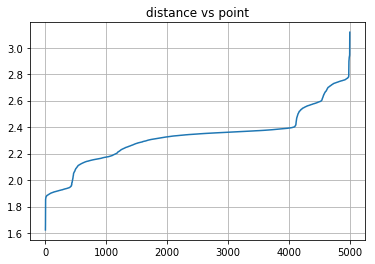

In [223]:
inc_index = np.argsort(di)
plt.plot(xi,di[inc_index])
plt.grid()
plt.title('distance vs point')
plt.show()

### Optimal Eps = 2.2 from above graph (As rate of change at below 2.2 is slighter less than above 2.2)

In [228]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=2.2, min_samples=minpts)
model_dbscan.fit(tr_X_5000)

DBSCAN(algorithm='auto', eps=2.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [229]:
model_dbscan.labels_

array([ 0,  0, -1, ..., 15,  2, -1], dtype=int64)

In [230]:
np.unique(model_dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16], dtype=int64)

In [ ]:
# -1 consider to be noisy data

# Take with 3 cluster including noisy data

In [231]:
tr_5000 = tr_X[:5000]
tr_5000['dbscan_cluster'] = model_dbscan.labels_.tolist()
tr_5000.head()

,0,1,2,3,4,5,6,7,8,9,...,7083,7084,7085,7086,7087,7088,7089,7090,k_cluster,dbscan_cluster
0,0.001726,0.000481,0.000148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,0
1,0.000144,0.003361,0.000741,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,0
2,0.000288,0.002205,0.000593,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,-1
3,0.002733,0.002801,0.000889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0
4,0.005753,0.000081,0.000889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,-1


### Cluster -1

In [232]:
col_index = tr_5000[tr_5000['dbscan_cluster']==-1].index.tolist()
tr_neg1 = []
for i in col_index:
    tr_neg1.append(str(project_data['clean_essay'].iloc[i]))

In [234]:
tr_neg1[0]

'students city around 85 students hispanic remainder african american caucasian 100 students receive free reduced lunch teach students currently 3rd grade reading kindergarten level non readers love learn hate read successful life often frustrated lack available resources books laptops projectors sometimes even supplies donation help correct situation students limited technology access classroom chromebooks multiple purposes classroom chromebooks able help students improve typing skills allow become fluent technology plan use google classroom student collaborate projects use google slides retell literary elements story reading class also plan students comment others writing using collaborative conversation sentence starters using class plan use chromebooks station within classroom use various websites multiple content areas students various interests want create time class students use chromebooks research topics interest chromebooks also help data collection reading writing also need 

In [233]:
word_dict = {}
for i in tr_neg1:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

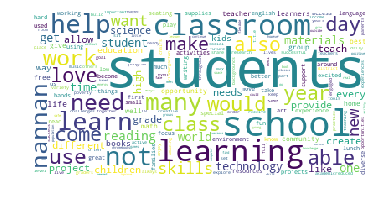

In [235]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Cluster 0

In [236]:
col_index = tr_5000[tr_5000['dbscan_cluster']==0].index.tolist()
tr_0 = []
for i in col_index:
    tr_0.append(str(project_data['clean_essay'].iloc[i]))

In [237]:
tr_0[0]

'teach ethnically racially diverse group fourth fifth grade students students group clustered students 80 students live poverty many lack access books home school library main place students go find books read teach north carolina 100 free reduced breakfast lunch school students school innovators creators students energized ready learn grow take pride community continue establish work create look forward next challenge donations project give students new inviting place relax plan reading seating give students another area become comfortable cozy good book read many small group activities six seven students therefore requesting seven bean bag chairs students area foster ideas comfortable meeting space want space place remind home promote good reading skills even school setting plan allow students complete design space first week school differentiated seating focal point area nannan'

In [238]:
word_dict = {}
for i in tr_0:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

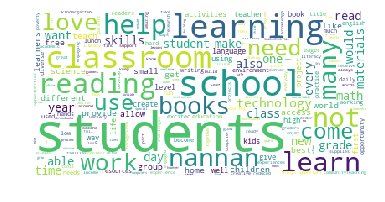

In [239]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Cluster 1

In [240]:
col_index = tr_5000[tr_5000['dbscan_cluster']==1].index.tolist()
tr_1 = []
for i in col_index:
    tr_1.append(str(project_data['clean_essay'].iloc[i]))

In [241]:
tr_1[0]

'5th graders tustin memorial academy tma tustin unified school district located santa ana california situated residential neighborhood serve high achieving magnet school accepts children varying neighborhoods tustin district boundaries lottery based system school choice makes student population diverse socio economic cultural backgrounds tma students serve national ambassadors world varying nationalities rich heritage deriving continents asia india europe mexico south north america school students special tma truly built community parent support volunteer programs parents teachers work together continue achieve make lasting difference every level proud achievements academically also take pride technology 1 1 ipad ratios physical fitness educating kids participate community activities requesting 30 unicef kid power bands start flossie 5th grade kid power team join teams around world wear specially designed bands track fitness activity earn points convert therapeutic food packets donatio

In [243]:
word_dict = {}
for i in tr_1:
    for j in i.split():
        if j not in word_dict.keys():
            word_dict[j] = 1
        else:
            word_dict[j] += 1

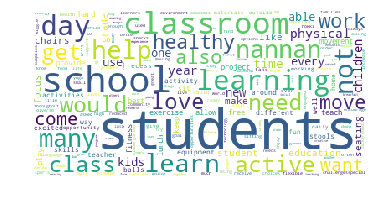

In [244]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h1>3. Cocnlusions</h1>
<br> Please write down few lines of your observations on this assignment.

1. Load and Merge the dataset train.csv and resource.csv based on project_id
2. We preprocessing text data on 'project title' and 'project essay' features
3. We perform onehot encoding on categorical features, TFIDF on text feature and Normalizer on numerical data
4. We perform 3 cluster techniques: KMeans, Agglemorative and DBSCAN with each hyperparameter

> **KMeans**<br>
a. We take 50k sample<br>
b. We reduce dimension 7k to 5k using PCA<br>
c. We perform KMean clustering with hyperparameter and we got k=19 using elbow method<br>
d. We mapped cluster labels to data
e. We print wordcloud for project essay with respect to their cluster. (Only 3 cluster printed)

> **Agglemorative**<br>
a. We take 5k sample<br>
b. we reduce dimension 7k to 5k using PCA<br>
c. We perform Aggleromativa clustering with two n_clusters value: 2 and 5
d. We mapped cluster labels to data
e. We print wordcloud for project essay with respect to their cluster.

> **DBSCAN**<br>
a. We take 5k sample<br>
b. we reduce dimension 7k to 5k using PCA<br>
c. In order to find optimal Eps, we first distance of each datapoint from minpts nearest point and then sorted distance in increasing order. We plot distance vs plot and by using elbow method, we get optimal eps value. We got Eps=2.2
d. We perform DBSCAN with hyperparameter Eps=2.2
e. We mapped cluster labels to data
f. We print wordcloud for project essay with respect to their cluster. 

In [1]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Feature','Model','n_cluster','Eps','Minpts']
x.add_row(['TFIDF','KMean',19,'-','-'])
x.add_row(['TFIDF','Aggleromative',2,'-','-'])
x.add_row(['TFIDF','Aggleromative',5,'-','-'])
x.add_row(['TFIDF','DBSCAN','-',2.2,10])

print(x)


+---------+---------------+-----------+-----+--------+
| Feature |     Model     | n_cluster | Eps | Minpts |
+---------+---------------+-----------+-----+--------+
|  TFIDF  |     KMean     |     19    |  -  |   -    |
|  TFIDF  | Aggleromative |     2     |  -  |   -    |
|  TFIDF  | Aggleromative |     5     |  -  |   -    |
|  TFIDF  |     DBSCAN    |     -     | 2.2 |   10   |
+---------+---------------+-----------+-----+--------+
